In [73]:
source("../../funcs/funcsR.R")

GMTS = c( "../../data/ref/gmts/h.all.v7.0.symbols.gmt.txt","../../data/ref/gmts/c2.cp.kegg.v7.0.symbols.gmt.txt")
GMT_list <- c(gmtPathways(GMTS[1]),gmtPathways(GMTS[2]))

## Pathways
---

In [74]:
de.df <- read.delim("diffexp/061721_raw_res_immune/full_de_cohort_cov.tsv", sep='\t', header=T)
de.df$feature <- gsub("acetylome", "acetylome_res", de.df$feature)
de.df$feature <- gsub("phosphoproteome", "phosphoproteome_res", de.df$feature)
de.df$abs <- abs(de.df$gsea_rank)

de.raw.df <- read.delim("diffexp/061721_raw_immune/full_de_cohort_cov.tsv", sep='\t', header=T)
de.raw.df$abs <- abs(de.raw.df$gsea_rank)
de.full.df <- rbind(de.df, de.raw.df)

In [75]:
e.de.df <- runAllGSEA(
    de.full.df, 
    GMT_list, 
    seed=42, 
    group_id="id", 
    weight_id="gsea_rank", 
    gene_id="gene_name", 
    minSize=3, 
    nperm=10000
)

Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.4% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There were 4 pathways for which P-values were not calculated properly due to unbalanced gene-level statistic values”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.01% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.4% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There were 8 pathways for which P-values were not calculated properly due to unbalanced gene-level statistic 

Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.03% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.39% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.05% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.01% of the list).
The order of those

In [91]:
e.c2.de.df <- e.de.df[e.de.df$id %in% c("1_c2","0_c2"),]
e.c3.de.df <- e.de.df[e.de.df$id %in% c("0_c3","2_c3","1_c3"),]
e.c4.de.df <- e.de.df[e.de.df$id %in% c("3_c4","1_c4","2_c4","0_c4"),]
e.nc.de.df <- e.de.df[!e.de.df$id %in% c("0_c2","1_c2","0_c3","1_c3","2_c3","0_c4","1_c4","2_c4","3_c4"),]

e.c2.de.df$id <- factor(e.c2.de.df$id, levels=c("1_c2","0_c2"))
e.c3.de.df$id <- factor(e.c3.de.df$id, levels=c("0_c3","2_c3","1_c3"))
e.c4.de.df$id <- factor(e.c4.de.df$id, levels=c("3_c4","1_c4","2_c4","0_c4"))
e.nc.de.df$id <- factor(e.nc.de.df$id, levels=unique(e.nc.de.df$id))

In [47]:
pdf("figures/immune_hallmark_balloon.pdf", width=16, height=16)
plotGSEA(e.nc.de.df, filter='HALLMARK', w=16, h=16)
dev.off()

pdf("figures/immune_c2_hallmark_balloon.pdf", width=9, height=8)
plotGSEA(e.c2.de.df, filter='HALLMARK', w=9, h=8)
dev.off()

pdf("figures/immune_c3_hallmark_balloon.pdf", width=12, height=12)
plotGSEA(e.c3.de.df, filter='HALLMARK', w=12, h=12)
dev.off()

pdf("figures/immune_c4_hallmark_balloon.pdf", width=14, height=12)
plotGSEA(e.c4.de.df, filter='HALLMARK', w=14, h=12)
dev.off()

Warning message:
“Removed 13 rows containing missing values (geom_point).”


png 
  2

Warning message:
“Removed 6 rows containing missing values (geom_point).”


png 
  2

Warning message:
“Removed 12 rows containing missing values (geom_point).”


png 
  2

Warning message:
“Removed 11 rows containing missing values (geom_point).”


png 
  2

In [48]:
pdf("figures/immune_kegg_balloon.pdf", width=16, height=24)
plotGSEA(e.nc.de.df, filter='KEGG', w=16, h=24)
dev.off()

pdf("figures/immune_c2_kegg_balloon.pdf", width=9, height=12)
plotGSEA(e.c2.de.df, filter='KEGG', w=9, h=12)
dev.off()

pdf("figures/immune_c3_kegg_balloon.pdf", width=12, height=18)
plotGSEA(e.c3.de.df, filter='KEGG', w=12, h=18)
dev.off()

pdf("figures/immune_c4_kegg_balloon.pdf", width=14, height=18)
plotGSEA(e.c4.de.df, filter='KEGG', w=14, h=18)
dev.off()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


png 
  2

png 
  2

Warning message:
“Removed 1 rows containing missing values (geom_point).”


png 
  2

png 
  2

In [51]:
pdf("figures/immune_metab_balloon.pdf", width=16, height=8)
plotGSEA(e.nc.de.df, filter='FATTY|MET', w=16, h=8)
dev.off()

pdf("figures/immune_c2_metab_balloon.pdf", width=9, height=5)
plotGSEA(e.c2.de.df, filter='FATTY|MET', w=9, h=5)
dev.off()

pdf("figures/immune_c3_metab_balloon.pdf", width=12, height=8)
plotGSEA(e.c3.de.df, filter='FATTY|MET', w=12, h=8)
dev.off()

pdf("figures/immune_c4_metab_balloon.pdf", width=14, height=8)
plotGSEA(e.c4.de.df, filter='FATTY|MET', w=14, h=8)
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [82]:
assignName <- function(x){
    if (x=="0_c4"){
        return("Cool")
    } else if (x=="1_c4"){
        return("Warm")
    } else if (x=="2_c4"){
        return("Cold")
    } else if (x=="3_c4"){
        return("Hot")
    }
}

In [92]:
e.c4.de.df$id <- sapply(e.c4.de.df$id, assignName)
e.c4.de.df$id <- factor(e.c4.de.df$id, levels=c("Cold","Cool","Warm","Hot"))

In [177]:
pathways_to_plot <- str_split("HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_TGF_BETA_SIGNALING
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
HALLMARK_COMPLEMENT
HALLMARK_INFLAMMATORY_RESPONSE
HALLMARK_XENOBIOTIC_METABOLISM
HALLMARK_FATTY_ACID_METABOLISM
HALLMARK_OXIDATIVE_PHOSPHORYLATION
HALLMARK_IL2_STAT5_SIGNALING
KEGG_GLYCOLYSIS_GLUCONEOGENESIS
KEGG_PYRUVATE_METABOLISM
KEGG_PROPANOATE_METABOLISM
KEGG_BUTANOATE_METABOLISM
KEGG_BIOSYNTHESIS_OF_UNSATURATED_FATTY_ACIDS","\n")[[1]]

In [178]:
pdf("figures/immune_subtypes_fig4b.pdf", width=11, height=7)
plotGSEA(e.c4.de.df[e.c4.de.df$pathway %in% pathways_to_plot,], w=11, h=7)
dev.off()

Warning message:
“Removed 2 rows containing missing values (geom_point).”


png 
  2

## PTM-GSEA
---

In [15]:
ptm.df <- read.delim("diffexp/061721_raw_res_immune/ptmgsea_cohort_cov/phosph_de_cohort_cov-combined.tsv", sep='\t', header=T) 

In [16]:
ptm.df <- ptm.df[ptm.df$id %in% c("0_c4","1_c4","2_c4","3_c4"),]
ptm.df$id <- factor(ptm.df$id, levels=c("3_c4","1_c4","2_c4","0_c4"))

In [20]:
pdf("figures/immune_subtypes_ptmgsea.pdf", width=6, height=16)
p <- plotPTMGSEA(ptm.df, filter="KINASE", w=6, h=16)
p + theme(axis.text.x = element_text(angle = 45, hjust=1))
dev.off()

Warning message:
“Removed 4 rows containing missing values (geom_point).”


png 
  2

In [32]:
#pdf("figures/treg_ptmgsea_balloon.pdf", width=8, height=24)
#p <- plotPTMGSEA(ptm.df, filter="PATH", w=8, h=24)
#p + theme(axis.text.x = element_text(angle = 45, hjust=1))
#dev.off()

png 
  2

## Differential Expression
---

In [142]:
de.df <- read.delim("diffexp/061721_raw_immune/full_de_cohort_cov.tsv", sep='\t', header=T)

In [143]:
getK <- function(x){
    return(as.character(strsplit(as.character(x),'_')[[1]][3]))
}

In [144]:
acetyl.de <- de.df[de.df$feature=='acetylome',]
acetyl.de$geneSymbol <- acetyl.de$gene_name
acetyl.de$varSite <- sapply(acetyl.de$index, getK)
acetyl.de$geneSite <- paste(acetyl.de$geneSymbol, acetyl.de$varSite, sep=" | ")

In [145]:
fa.m <- c('ACADVL', 'ACO2', 'ECHS1', 'ECH1', 'ACAA2',  'HADHB', 'DLD', 'PDHA1','LSP1','PSMB9',
          'HIST2H2BF')

In [146]:
sub.df <- acetyl.de[acetyl.de$id=="2_c4",]

In [74]:
pdf("figures/immuneCold_acetyl_volcano.pdf", width=10, height=10)
plotVolcano(
    sub.df, 
    gene.id='gene_name',
    genePTM=fa.m,
    xlim=c(-6,6),
    ylim=6.5,
    widthConnectors = 0.25,
    drawConnectors= T, 
    boxedLabels = T,
    h=10,
    w=10,
    labSize=2,
    #labvjust=1,
    #labhjust=3,
    title="Immune Cool",
    lab.pval.thresh=.1,
    legendPosition='none',
    pointSize=2
)
dev.off()

Warning message in if (!is.na(xlim)) {:
“the condition has length > 1 and only the first element will be used”


png 
  2

In [147]:
sub.df <- acetyl.de[acetyl.de$id=="0_c4",]

In [174]:
pdf("figures/immuneCool_acetyl_volcano_fig4.pdf", width=10, height=10)
plotVolcano(
    sub.df, 
    gene.id='gene_name',
    genePTM=fa.m,
    xlim=c(-3,3),
    ylim=3.75,
    widthConnectors = 0.5,
    drawConnectors= T, 
    boxedLabels = T,
    h=10,
    w=10,
    labSize=5,
    labvjust=1.5,
    labhjust=1.5,
    title="Immune Cool",
    lab.pval.thresh=0.1,
    legendPosition='none',
    pointSize=4,
    fcCut = 0
)
dev.off()

Warning message in if (!is.na(xlim)) {:
“the condition has length > 1 and only the first element will be used”


png 
  2

## Correlations Plots
---

In [43]:
library(stringr)

In [66]:
plotCorr <- function(e_df, pval.thresh=0.1, palette='RdBu', h=13, w=15, s_color='black', title=NULL){
    e_df$sig <- e_df$pval<pval.thresh
    e_df$logpval <- -log10(e_df$pval)
    
    ### Order axis by dendrogram
    # Load data
    X <-  e_df[,c('geneSymbol','geneSite','rho','pval')]

    # Build the dendrogram
    dend <- as.dendrogram(hclust(d = dist(x = X)))
    dendro.plot <- ggdendrogram(dend,rotate = TRUE)
    order <- order.dendrogram(dend)

    #e_df$geneSite <- factor(x = e_df$geneSite, levels = unique(e_df[order,]$geneSite), ordered = TRUE)
    #e_df$geneSymbol <- factor(x = e_df$geneSymbol, levels = unique(e_df[order,]$geneSymbol), ordered = TRUE)

    ### Balloonplot
    options(repr.plot.width=w, repr.plot.height=h)
    
    # Order by Residue Number
    e_df <- e_df[order(e_df$resNum),]
    e_df$varSite <- factor(x = e_df$varSite, levels = unique(e_df$varSite), ordered = TRUE)

    #return(e_df)
    p <- ggballoonplot(
        e_df,
        x="geneSymbol",
        y="varSite",
        fill = "rho",
        size="logpval",
        color=ifelse(e_df$sig==T, s_color, "lightgrey")
        ) +
        scale_fill_distiller(palette=palette, limit = max(abs(e_df$rho)) * c(-1, 1))+
        labs(x="", y="", fill="Spearman Rho", size="-log10 Adj. P-val") + theme_linedraw() +
        theme(axis.text.x=element_text(angle=45, vjust = 1, hjust=1, size=15),
              axis.text.y=element_text(size=13),
              plot.title = element_text(size = 20),
              strip.text.y = element_text(size=16, face="bold"),
             ) + ggtitle(title) + facet_grid(b_gene ~ ., scales = "free", space = "free")
    return(p)
}

In [122]:
fa_corr_df <- read.delim("output/fa_corr.tsv", sep='\t', row.names=1)

In [126]:
fa_corr_df <- fa_corr_df[fa_corr_df$comp=='prot_acetyl',]
fa_corr_df$geneSymbol <- fa_corr_df$a_gene
fa_corr_df$varSite <- sapply(fa_corr_df$b, getK)
fa_corr_df$geneSite <- paste(fa_corr_df$b_gene, fa_corr_df$varSite, sep="|")

# Get Number
getResNum <- function(x){
    return(as.numeric(str_sub(strsplit(as.character(x),'_')[[1]][3], 2,-2)))
}

fa_corr_df$resNum <- sapply(fa_corr_df$b, getResNum)

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

In [127]:
#fa_highlights = c('ACADVL', 'ACO2', 'ECHS1', 'ECH1', 'ACAA2',  'HADHB', 'DLD', 'PDHA1')
fa_highlights = c('AC02','ACAA2','HADHA','HADHB','ACADVL','HADH')
ig_highlights = c('GZMA', 'CD38','VCAM1', 'ISG20','ISG15','LAP3','SOD2','TAPBP','STAT1','STAT2')

In [133]:
hadha_sites <- c("K60k","K129k","K163k","K214k","K406k","K411k","K569k","K644k","K728k","K735k","K759k")

In [128]:
fa_corr_df <- fa_corr_df[fa_corr_df$a_gene %in% ig_highlights,]
fa_corr_df <- fa_corr_df[fa_corr_df$b_gene %in% fa_highlights,]

In [ ]:
hadha_filt <- fa_corr_df[fa_corr_df$b_gene=="HADHA",]
hadha_filt <- hadha_filt[hadha_filt$varSite %in% hadha_sites,]

hadha_not_filt <- fa_corr_df[fa_corr_df$b_gene!="HADHA",]
fa_filt_corr_df <- rbind(hadha_filt, hadha_not_filt)

In [141]:
pdf("figures/ifg_fametab_balloon_4e.pdf", width=6, height=14)
plotCorr(fa_filt_corr_df, w=6, h=14)
dev.off()

Warning message in dist(x = X):
“NAs introduced by coercion”


png 
  2

In [71]:
pdf("figures/ifg_fametab_balloon.pdf", width=6, height=16)
plotCorr(fa_corr_df, w=6, h=16)
dev.off()

Warning message in dist(x = X):
“NAs introduced by coercion”


png 
  2

Warning message in dist(x = X):
“NAs introduced by coercion”


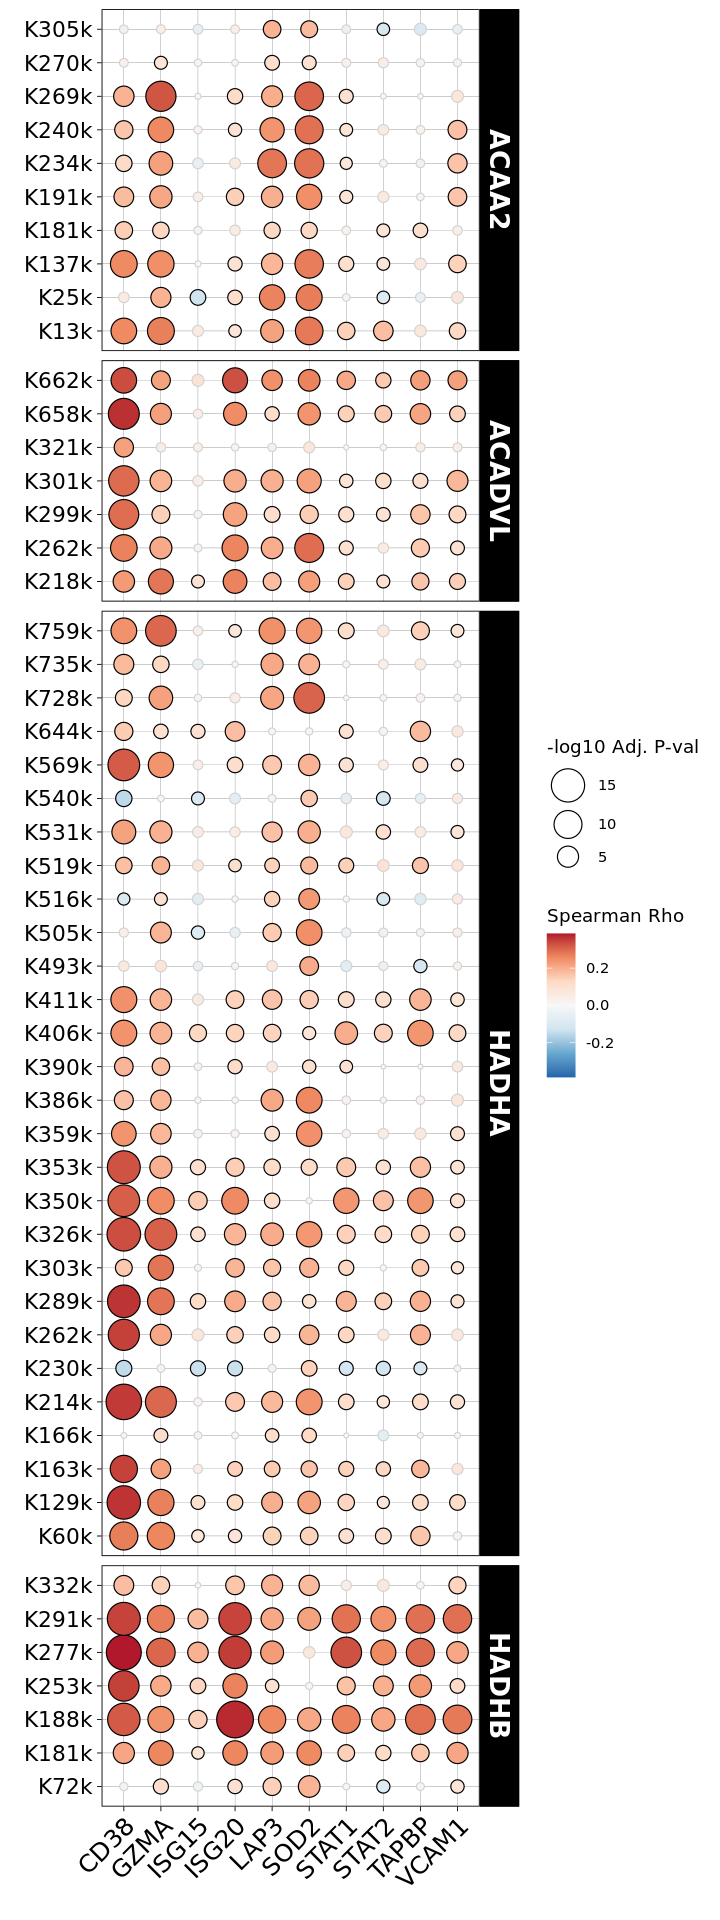

In [72]:
plotCorr(fa_corr_df, w=6, h=16)

